In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
llm_responses = pd.read_csv('train.csv')

In [4]:
llm_responses.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [5]:
llm_responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              57477 non-null  int64 
 1   model_a         57477 non-null  object
 2   model_b         57477 non-null  object
 3   prompt          57477 non-null  object
 4   response_a      57477 non-null  object
 5   response_b      57477 non-null  object
 6   winner_model_a  57477 non-null  int64 
 7   winner_model_b  57477 non-null  int64 
 8   winner_tie      57477 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


In [6]:
type(llm_responses['response_a'][0])

str

In [5]:
def countPhrasesLengths(prompt, response_a, response_b):
    return {'prompt': len(prompt), 'response_a': len(response_a), 'response_b': len(response_b)}
llm_responses[['prompt_len', 'response_a_len', 'response_b_len']] = llm_responses[['prompt', 'response_a', 'response_b']].apply(lambda x : countPhrasesLengths(x.prompt, x.response_a, x.response_b), axis = 1, result_type = 'expand')
llm_responses.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,prompt_len,response_a_len,response_b_len
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,165,4538,1206
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,200,3114,3649
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,60,921,1835
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,87,3182,1562
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,79,1300,772


In [8]:
winner_model_length_stats = {}
winner_model_length_stats['num_of_models'] = len(llm_responses)
winner_model_length_stats['total_a_wins'] = len(llm_responses[llm_responses['winner_model_a'] == 1])
winner_model_length_stats['total_b_wins'] = len(llm_responses[llm_responses['winner_model_b'] == 1])
winner_model_length_stats['total_ties'] = len(llm_responses[llm_responses['winner_tie'] == 1])
winner_model_length_stats['times_longer_model_a_wins'] = len(llm_responses[(llm_responses['winner_model_a'] == 1) & (llm_responses['response_a'].map(len) > llm_responses['response_b'].map(len))])
winner_model_length_stats['times_longer_model_b_wins'] = len(llm_responses[(llm_responses['winner_model_b'] == 1) & (llm_responses['response_a'].map(len) < llm_responses['response_b'].map(len))])
winner_model_length_stats['total_times_longer_response_wins'] = winner_model_length_stats['times_longer_model_a_wins'] + winner_model_length_stats['times_longer_model_b_wins']
winner_model_length_stats

{'num_of_models': 57477,
 'total_a_wins': 20064,
 'total_b_wins': 19652,
 'total_ties': 17761,
 'times_longer_model_a_wins': 12316,
 'times_longer_model_b_wins': 12108,
 'total_times_longer_response_wins': 24424}

In [5]:
def retrieveWinnersLengths(row):
  if(row.winner_model_a == 1):
    return row.response_a_len
  if(row.winner_model_b == 1):
    return row.response_b_len
  return None
llm_responses['winner_length'] = llm_responses.apply(lambda row : retrieveWinnersLengths(row), axis = 1)
llm_responses.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,prompt_len,response_a_len,response_b_len,winner_length
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,165,4538,1206,4538.0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,200,3114,3649,3649.0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,60,921,1835,NaN
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,87,3182,1562,3182.0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,79,1300,772,772.0


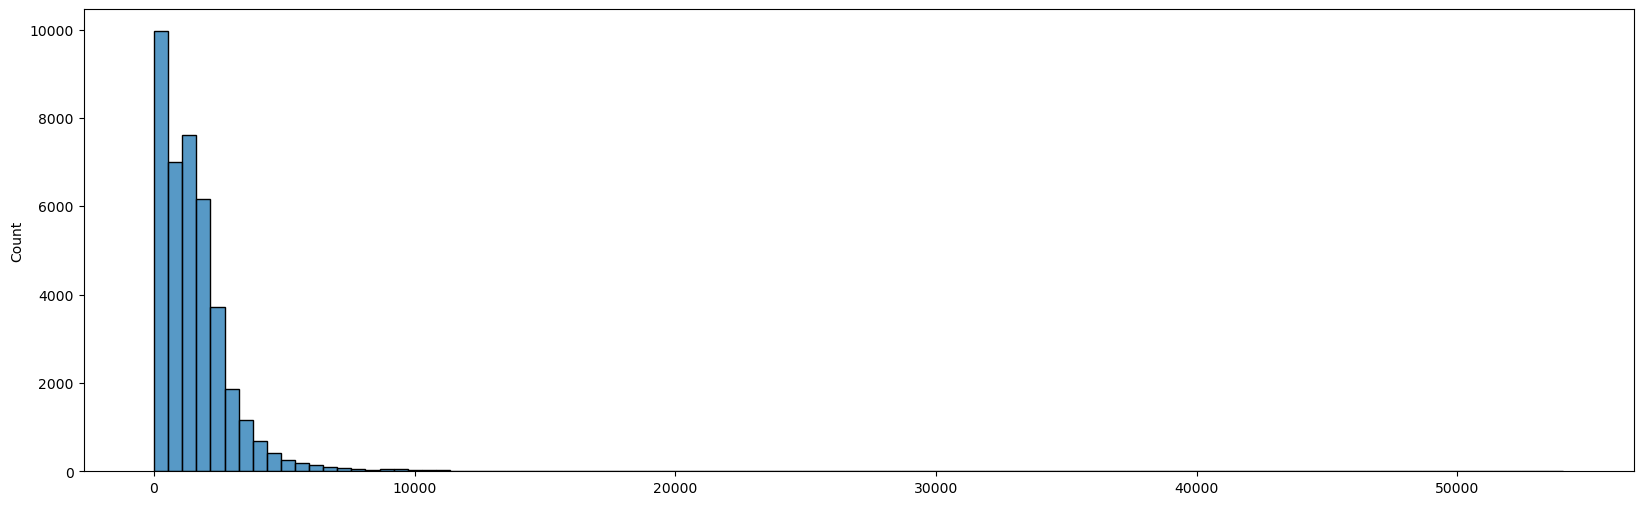

In [10]:
plt.figure(figsize = (20, 6))
sns.histplot(llm_responses.apply(lambda row : retrieveWinnersLengths(row), axis = 1), bins = 100)
plt.show()

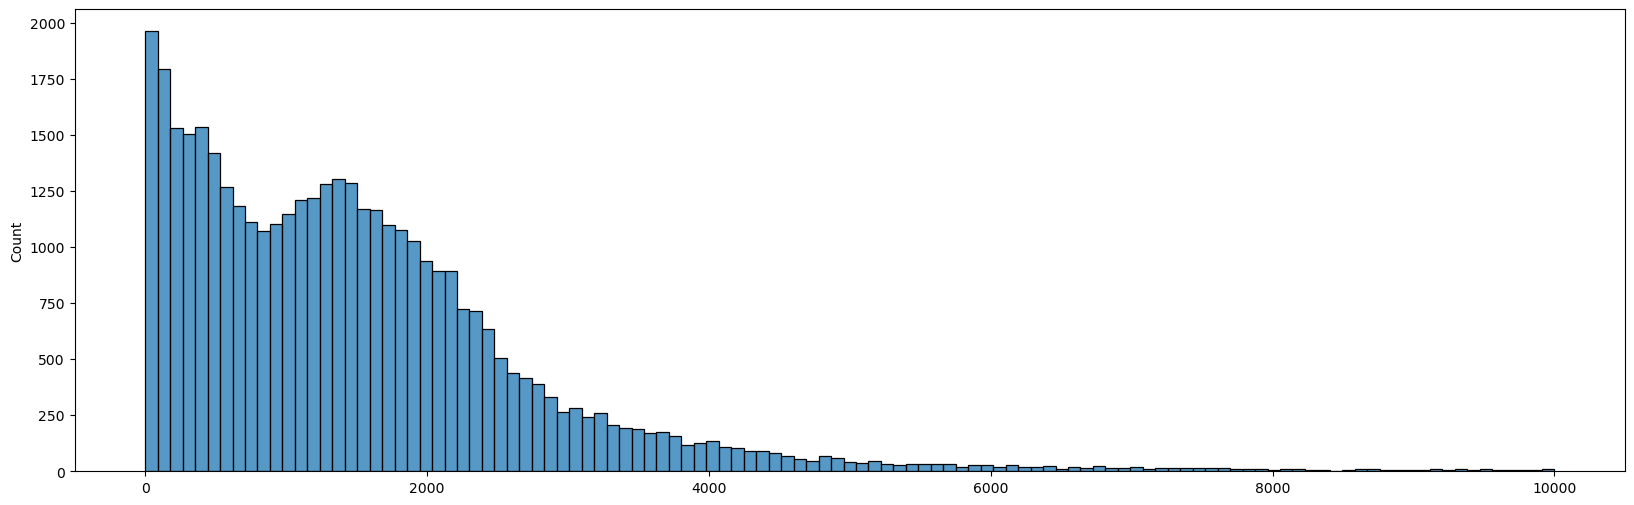

In [11]:
plt.figure(figsize = (20, 6))
sns.histplot(llm_responses.apply(lambda row : retrieveWinnersLengths(row), axis = 1), binrange = (0, 10000))
plt.show()

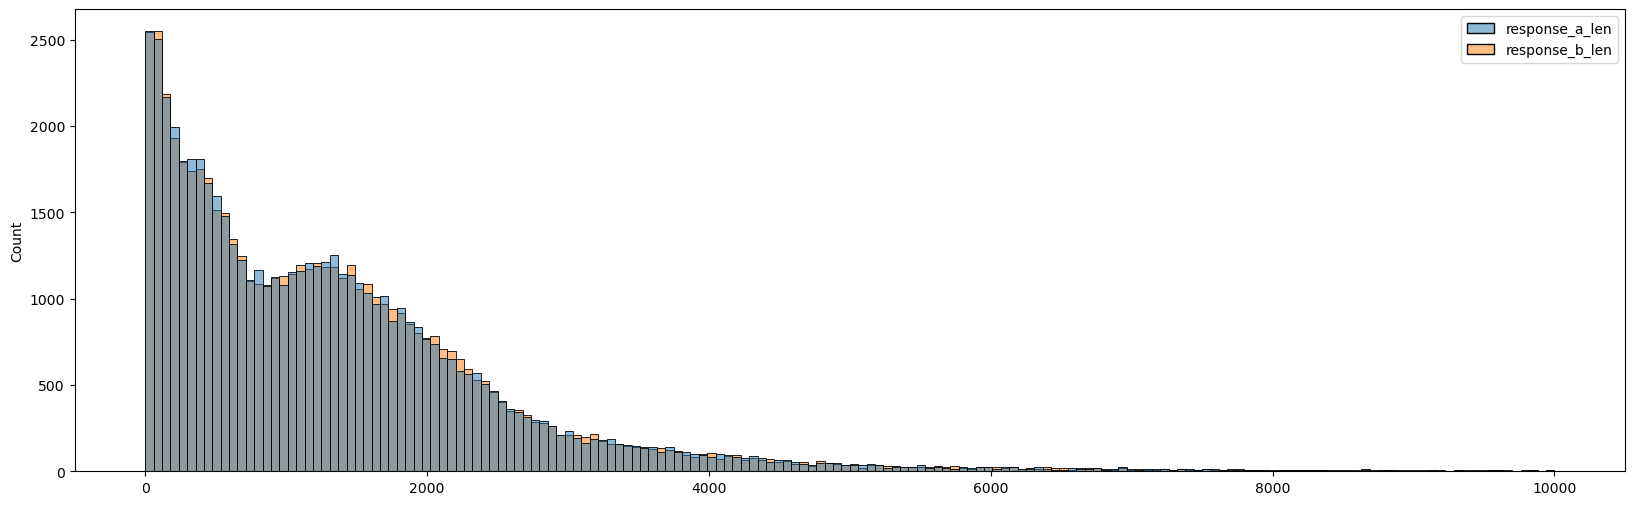

In [12]:
plt.figure(figsize = (20, 6))
sns.histplot(llm_responses[['response_a_len', 'response_b_len']], binrange = (0, 10000))
plt.show()

In [13]:
len((llm_responses['model_a'] + llm_responses['model_b']).apply(lambda llm_model : llm_model.split('-')[0]).unique())

39

In [14]:
winning_models = pd.DataFrame()
def getWinningModel(row):
  if(row.winner_model_a == 1):
      return row.model_a.split('-')[0]
  if(row.winner_model_b == 1):
      return row.model_b.split('-')[0]
  return 'Tie'
winning_models['winning_model'] = llm_responses.apply(lambda row : getWinningModel(row), axis = 1)
winning_models.head()

,winning_model
0,gpt
1,gpt
2,Tie
3,llama
4,gpt


In [15]:
winning_models_by_num_of_wins = winning_models.groupby('winning_model')['winning_model'].count().sort_values(ascending = False)
winning_models_by_num_of_wins

winning_model
Tie             17761
gpt             13343
claude           6048
vicuna           2960
llama            2775
mistral          1633
mixtral          1196
wizardlm         1160
gemini            945
zephyr            833
pplx              776
palm              637
koala             561
openchat          536
yi                531
codellama         427
mpt               420
starling          402
tulu              378
alpaca            356
oasst             343
qwen1.5           301
openhermes        280
qwen              276
RWKV              265
guanaco           246
solar             242
chatglm           217
stripedhyena      206
fastchat          196
deepseek          190
llama2            179
chatglm3          157
stablelm          132
dolly             124
nous              106
dolphin            95
gpt4all            93
falcon             78
chatglm2           73
Name: winning_model, dtype: int64

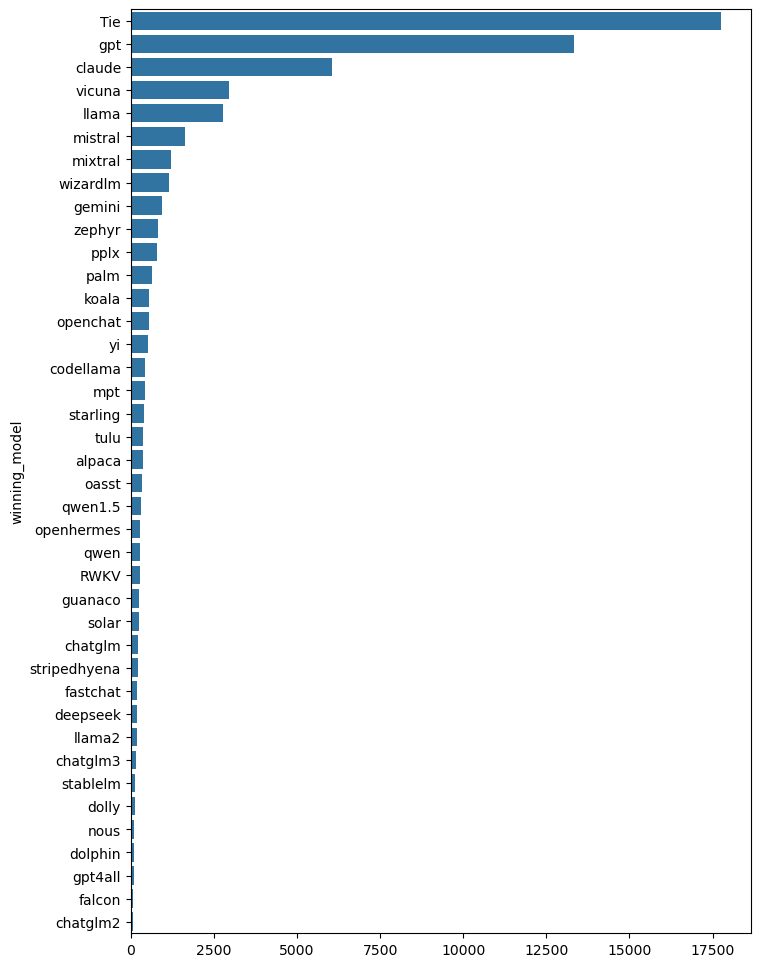

In [16]:
plt.figure(figsize = (8, 12))
sns.barplot(x = winning_models_by_num_of_wins.values, y = winning_models_by_num_of_wins.index)
plt.show()

<Axes: ylabel='Model'>

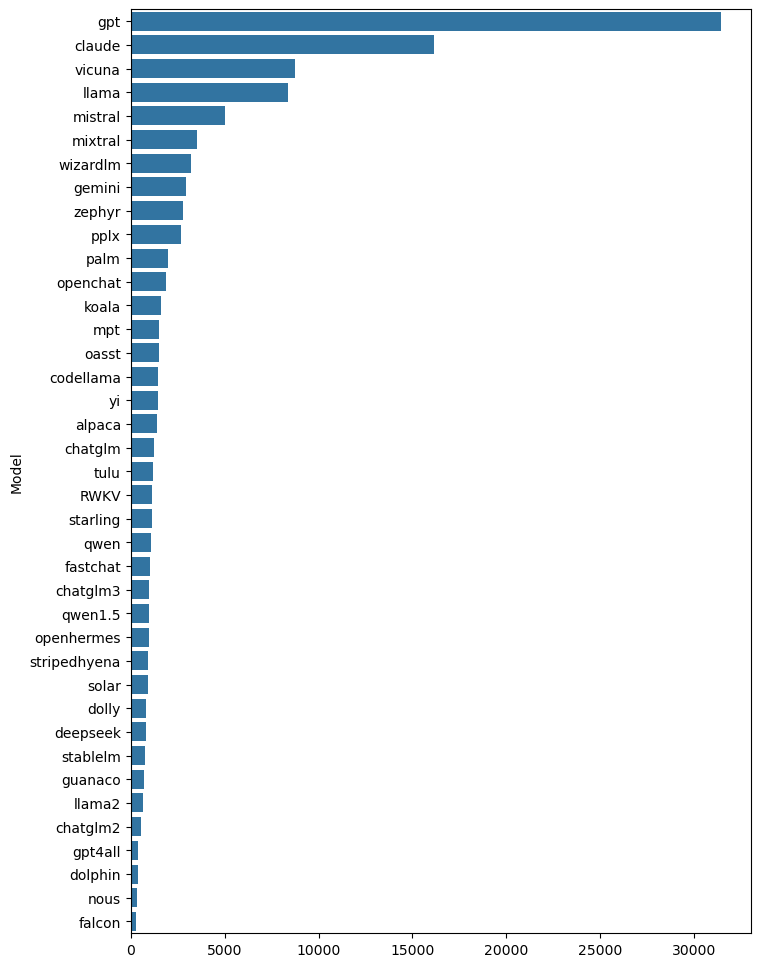

In [17]:
models_by_num_of_occurences = pd.DataFrame(pd.concat([llm_responses['model_a'], llm_responses['model_b']]).apply(lambda model : model.split('-')[0]), columns = ['Model']).groupby('Model')['Model'].count().sort_values(ascending = False)
plt.figure(figsize = (8, 12))
sns.barplot(x = models_by_num_of_occurences.values, y = models_by_num_of_occurences.index)

In [6]:
import re

In [451]:
def format_responses(row):
    formatted_cols = []
    for text in [row.prompt, row.response_a, row.response_b]:
        formatted_cols.append(re.sub(' +', ' ', re.sub('[^\w ]', ' ', re.sub('\\\\n', ' ', text))).strip())
    return formatted_cols
llm_responses[['formatted_prompt', 'formatted_response_a', 'formatted_response_b']] = llm_responses[['prompt', 'response_a', 'response_b']].apply(lambda row: format_responses(row), axis = 1, result_type = 'expand')
llm_responses[['formatted_prompt', 'formatted_response_a', 'formatted_response_b']].head()

,formatted_prompt,formatted_response_a,formatted_response_b
0,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,As an AI I don t have personal beliefs or opin...
1,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...
2,explain function calling how would you call a ...,Function calling is the process of invoking or...,Function calling is the process of invoking a ...
3,How can I create a test set for a very rare ca...,Creating a test set for a very rare category c...,When building a classifier for a very rare cat...
4,What is the best way to travel from Tel Aviv t...,The best way to travel from Tel Aviv to Jerusa...,The best way to travel from Tel Aviv to Jerusa...


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [400]:
def concatenate_responses(row):
    return "Prompt: " + row.formatted_prompt[0:100] + " Response_A: " + row.formatted_response_a[0:300] + " Response_B: " + row.formatted_response_b[0:300]

In [110]:
text_vectorizer = CountVectorizer(analyzer = lambda text : text.split()).fit(llm_responses[['formatted_prompt', 'formatted_response_a', 'formatted_response_b']].apply(lambda row : concatenate_responses(row), axis = 1))
print(len(text_vectorizer.vocabulary_))

531008


In [111]:
print(text_vectorizer.transform([llm_responses['formatted_response_a'][0]]).shape)
#pd.concat([llm_responses['formatted_response_a'], llm_responses['formatted_response_b']]).apply(lambda text : text.split())

(1, 531008)


In [113]:
responses_vectorized = text_vectorizer.transform(llm_responses[['formatted_prompt', 'formatted_response_a', 'formatted_response_b']].apply(lambda row : concatenate_responses(row), axis = 1))

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [114]:
tfidf_transformer = TfidfTransformer().fit(responses_vectorized)

In [115]:
responses_tfidf = tfidf_transformer.transform(responses_vectorized)
responses_tfidf.shape

(57477, 531008)

In [7]:
from sklearn.model_selection import train_test_split

In [88]:
def retrieve_labels(row):
    #return [row.winner_model_a.item(), row.winner_model_b.item(), row.winner_tie.item()]
    if(row.winner_tie == 1):
        return 'Tie'
    if(row.winner_model_a == 1):
        return 'model_a'
    return 'model_b'
    #return 'Not a tie'
labels = llm_responses[['winner_model_a', 'winner_model_b', 'winner_tie']].apply(lambda row : retrieve_labels(row), axis = 1)
labels

0        model_a
1        model_b
2            Tie
3        model_a
4        model_b
          ...   
57472    model_a
57473    model_a
57474    model_a
57475    model_b
57476    model_a
Length: 57477, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(responses_tfidf, labels, test_size = 0.3)

NameError: name 'responses_tfidf' is not defined

In [117]:
y_test

56436    model_a
54482    model_b
38071        Tie
52709    model_b
55275    model_a
          ...   
21232        Tie
38335    model_b
3802     model_b
36015    model_a
40585    model_a
Length: 17244, dtype: object

In [73]:
from sklearn.linear_model import LogisticRegression

In [118]:
log_model = LogisticRegression(max_iter = 500)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [119]:
predictions = log_model.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

In [120]:
print(accuracy_score(predictions, y_test))

0.37833449315704015


In [121]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

         Tie       0.35      0.42      0.38      4518
     model_a       0.42      0.37      0.39      6836
     model_b       0.36      0.36      0.36      5890

    accuracy                           0.38     17244
   macro avg       0.38      0.38      0.38     17244
weighted avg       0.38      0.38      0.38     17244



In [122]:
predictions

array(['model_a', 'model_a', 'Tie', ..., 'model_a', 'Tie', 'model_a'],
      dtype=object)

In [8]:
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import pytextrank
from collections import Counter

C:\Users\User\anaconda3\Lib\site-packages


In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
import spacy
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm', disable=["parser", "ner"])
nlp.add_pipe('textrank')
nlp.add_pipe('sentencizer')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
lemmatizer = WordNetLemmatizer()
word_net_pos = {'J' : 'a', 'R' : 'r', 'V' : 'v'}

def get_word_net_pos(tag):
    first_letter = tag[0]
    if(first_letter in word_net_pos.keys):
        return word_net_pos[first_letter]
    return 'n'

def lemmatize(tokenized_words):
    return ' '.join([lemmatizer.lemmatize(word, 'n') for word in tokenized_words])
    
def remove_stop_words(text):
    return [word for word in word_tokenize(text.lower()) if word not in stop_words]

In [319]:
def remove_stop_words_and_lemmatize_with_spacy(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if not token.is_stop]

In [466]:
llm_responses['response_a'][0:1].apply(lambda text : re.sub('[^a-zA-Z0-9 \\.]', '', re.sub('[\\[\\]]', '', re.sub('\\\\n', ' ', text))))[0]
#example_response = llm_responses['formatted_response_a'][0]
#llm_responses['response_a'][0:1].apply(lambda text : re.sub('^[a-zA-Z0-9]', '', text).strip())[0]
#example_response

'The question of whether it is morally right to aim for a certain percentage of females in managerial positions is a complex ethical issue that involves considerations of fairness equality diversity and discrimination.  Here are some arguments in favor of and against such policies  Arguments in favor  1. Correcting Historical Inequities Women have historically been underrepresented in leadership roles due to various cultural institutional and social barriers. Aiming for a specific percentage can be seen as a corrective measure to address past and ongoing discrimination.  2. Promoting Diversity Diverse leadership teams can enhance decisionmaking and represent a broader range of perspectives. This can lead to better outcomes for organizations and society as a whole.  3. Equality of Opportunity Setting targets for female representation in management can help ensure that women have equal opportunities to advance in their careers.  4. Role Modeling Increased visibility of female leaders can

In [489]:
word_frequencies = Counter(remove_stop_words(example_response))
#word_frequencies

In [510]:
sentences = llm_responses['response_a'][0:1].apply(lambda text : re.split('[\\.?!]', re.sub('[^a-zA-Z0-9 \\.?!]', '', re.sub('[\\[\\]]', '', re.sub('\\\\n', ' ', text)))))[0]
#sentences

In [509]:
sentence_scores = {}
for sentence in sentences:
    if sentence not in sentence_scores.keys():
        sentence_scores[sentence] = 0
    for word in sentence.split():
        #print('Word:' + word)
        if word.lower() in word_frequencies.keys(): 
           #print('Frequency:' + str(word_frequencies[word.lower()]))
           sentence_scores[sentence] += word_frequencies[word.lower()] 
#sentence_scores

In [12]:
from heapq import nlargest

In [532]:
summary = nlargest(4, sentence_scores, key = sentence_scores.get)
len('.'.join(summary))

828

In [13]:
def summarize(text, sentences_num):
    word_frequencies = Counter(remove_stop_words(re.sub(' +', ' ', re.sub('[^\w ]', ' ', re.sub('\\\\n', ' ', text))).strip()))
    sentences = re.split('[\\.?!]', re.sub('[^a-zA-Z0-9 \\.?!]', '', re.sub('[\\[\\]]', '', re.sub('\\\\n', ' ', text))))
    sentence_scores = {}
    for sentence in sentences:
        if sentence not in sentence_scores.keys():
            sentence_scores[sentence] = 0
        for word in sentence.split():
            if word.lower() in word_frequencies.keys():
                sentence_scores[sentence] += word_frequencies[word.lower()]
    summary = nlargest(sentences_num, sentence_scores, key = sentence_scores.get)
    return '.'.join(summary)

In [17]:
llm_responses['response_a_summarized'] = llm_responses['response_a'].apply(lambda text : summarize(text, 3))

In [18]:
llm_responses['response_b_summarized'] = llm_responses['response_b'].apply(lambda text : summarize(text, 3))

In [19]:
llm_responses['prompt_summarized'] = llm_responses['prompt'].apply(lambda text : summarize(text, 2))

In [21]:
llm_responses['response_b_summarized'].apply(lambda text : len(text)).mean().item()

424.48786471110185

In [20]:
def concatenate_summarized_cols(row):
    return 'Prompt: ' + re.sub('\\.', ' ', row.prompt_summarized) + ' Response_A: ' + re.sub('\\.', ' ', row.response_a_summarized) + ' Response_B: ' + re.sub('\\.', ' ', row.response_b_summarized)

In [579]:
#llm_responses[['formatted_prompt', 'formatted_response_a', 'formatted_response_b']][0:1000].apply(lambda row : remove_stop_words_and_lemmatize_with_spacy(concatenate_responses(row)), axis = 1)
#llm_responses[['formatted_prompt', 'formatted_response_a', 'formatted_response_b']][0:1000].apply(lambda row : lemmatize(remove_stop_words(concatenate_responses(row))), axis = 1)
llm_responses[['prompt_summarized', 'response_a_summarized', 'response_b_summarized']][0:1000].apply(lambda row : lemmatize(remove_stop_words(concatenate_summarized_cols(row))), axis = 1)

0      prompt : morally right try certain percentage ...
1      prompt : get quick possible california minimal...
2      prompt : explain function calling would call f...
3      prompt : create test set rare category want bu...
4      prompt : best way travel telaviv jerusalem car...
                             ...                        
995    prompt : use logic reason science fact framewo...
996    prompt : response_a : ai language model dont f...
997    prompt : implement h264 video decoder pure rus...
998    prompt : write subsection master thesis machin...
999    prompt : implement karatsuba algorithm command...
Length: 1000, dtype: object

In [23]:
#rnn_train_data = llm_responses[['formatted_prompt', 'formatted_response_a', 'formatted_response_b']].apply(lambda row : lemmatize(remove_stop_words(concatenate_responses(row))), axis = 1)
rnn_train_data = llm_responses[['prompt_summarized', 'response_a_summarized', 'response_b_summarized']].apply(lambda row : lemmatize(remove_stop_words(concatenate_summarized_cols(row))), axis = 1)

In [24]:
encoder = tf.keras.layers.TextVectorization(max_tokens = 20000)
encoder.adapt(rnn_train_data)

In [25]:
vocabulary = np.array(encoder.get_vocabulary())
vocabulary.shape

(20000,)

In [27]:
text_to_encode = llm_responses['formatted_response_a'][57476]
text_to_encode

KeyError: 'formatted_response_a'

In [615]:
encoder(text_to_encode).numpy()

array([1970,    1])

In [616]:
' '.join(vocabulary[encoder(text_to_encode).numpy()])

'27 [UNK]'

In [62]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape = (1,), dtype = tf.string))
model.add(encoder)
model.add(tf.keras.layers.Embedding(len(vocabulary), 64, mask_zero = True))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences = True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(3, activation = 'sigmoid'))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [63]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [22]:
def retrieve_labels_as_array(row):
    return [row.winner_model_a.item(), row.winner_model_b.item(), row.winner_tie.item()]
labels_as_arr = llm_responses[['winner_model_a', 'winner_model_b', 'winner_tie']].apply(lambda row : retrieve_labels_as_array(row), axis = 1)
labels_as_arr

0        [1, 0, 0]
1        [0, 1, 0]
2        [0, 0, 1]
3        [1, 0, 0]
4        [0, 1, 0]
           ...    
57472    [1, 0, 0]
57473    [1, 0, 0]
57474    [1, 0, 0]
57475    [0, 1, 0]
57476    [1, 0, 0]
Length: 57477, dtype: object

In [64]:
X_train, X_test, y_train, y_test = train_test_split(rnn_train_data, labels_as_arr, test_size = 0.3)

In [65]:
X_train#[49684]

26371    prompt : write sentence every word start lette...
33781    prompt : best way prepare leet code based inte...
46574    prompt : countop function test working right t...
6052     prompt : certified jew expert greeting friend ...
22765    prompt : write threesentence summary show devs...
                               ...                        
26828    prompt : write story silver sable captured kin...
38527    prompt : contusion blow thumb swelling impedin...
27207    prompt : whats square root two response_a : sq...
46321    prompt : reply chinese know chinese people say...
14732    prompt : studying becoming gamedev want idea t...
Length: 40233, dtype: object

In [66]:
y_test

35674    [0, 1, 0]
37973    [1, 0, 0]
56206    [0, 0, 1]
2041     [0, 0, 1]
2984     [1, 0, 0]
           ...    
52141    [0, 1, 0]
48114    [1, 0, 0]
24837    [0, 1, 0]
31514    [1, 0, 0]
23295    [0, 0, 1]
Length: 17244, dtype: object

In [67]:
X_train_tensor = tf.convert_to_tensor(X_train.to_numpy(), tf.string)
X_train_tensor

<tf.Tensor: shape=(40233,), dtype=string, numpy=
array([b'prompt : write sentence every word start letter response_a : amazing array amazing attribute attracts amazing attention response_b : absolutely apple appetizing amazing',
       b'prompt : best way prepare leet code based interview response_a : practice practice practice start easy problem leetcode work way challenging one mock interview feedback practice friend online platform offer mock interview preparing leetcodebased interview involves developing strong understanding algorithm data structure well improving problemsolving coding skill response_b : practice leet code best way prepare leet code based interview practice platform understand concept leet code problem cover wide range concept including algorithm data structure string array linked list tree graph dynamic programming preparing leet code based interview requires combination practice problemsolving skill knowledge algorithm data structure',
       b'prompt : countop f

In [68]:
y_train_tensor = tf.convert_to_tensor(np.array(y_train.to_list()).astype(np.float32), dtype = tf.float32)
y_train_tensor

<tf.Tensor: shape=(40233, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

In [69]:
model.fit(X_train_tensor, y_train_tensor, epochs = 5)

Epoch 1/5


C:\Users\User\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:675: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1258/1258 ━━━━━━━━━━━━━━━━━━━━ 675s 526ms/step - accuracy: 0.3810 - loss: 1.0866 
Epoch 2/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 637s 507ms/step - accuracy: 0.4885 - loss: 1.0066
Epoch 3/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 877s 697ms/step - accuracy: 0.6473 - loss: 0.7863 
Epoch 4/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 1317s 1s/step - accuracy: 0.7944 - loss: 0.5016   
Epoch 5/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 715s 568ms/step - accuracy: 0.8874 - loss: 0.2855 


In [75]:
model.fit(X_train_tensor, y_train_tensor, epochs = 5)

Epoch 1/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 527s 419ms/step - accuracy: 0.9323 - loss: 0.1742 
Epoch 2/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 532s 423ms/step - accuracy: 0.9524 - loss: 0.1243
Epoch 3/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 536s 426ms/step - accuracy: 0.9633 - loss: 0.0957
Epoch 4/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 531s 422ms/step - accuracy: 0.9706 - loss: 0.0750
Epoch 5/5
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 514s 409ms/step - accuracy: 0.9755 - loss: 0.0646


In [76]:
rnn_predictions = model.predict(tf.convert_to_tensor(X_test.to_numpy(), tf.string))
rnn_predictions

539/539 ━━━━━━━━━━━━━━━━━━━━ 84s 156ms/step 


array([[0.7255676 , 0.17671964, 0.45672533],
       [0.8332859 , 0.24304119, 0.2309024 ],
       [0.81613773, 0.50502986, 0.08301099],
       ...,
       [0.05903874, 0.99921846, 0.00922778],
       [0.3495572 , 0.95732623, 0.06175598],
       [0.02337769, 0.31052822, 0.9805675 ]], dtype=float32)

In [90]:
def transform_rnn_predictions(arr):
    result_arr = []
    for row in arr:
        arr_to_add = [0,0,0]
        pos = 0
        max = row[0]
        for i in range(len(row)):
            if row[i]>max:
                pos = i
                max = row[i]
        arr_to_add[pos] = 1
        result_arr.append(arr_to_add)
    return result_arr

rnn_predictions_transformed = transform_rnn_predictions(rnn_predictions)

In [91]:
print(accuracy_score(rnn_predictions_transformed, y_test.tolist()))

0.3740431454418928


In [92]:
print(classification_report(rnn_predictions_transformed, y_test.tolist()))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37      5911
           1       0.39      0.38      0.38      6060
           2       0.36      0.37      0.37      5273

   micro avg       0.37      0.37      0.37     17244
   macro avg       0.37      0.37      0.37     17244
weighted avg       0.37      0.37      0.37     17244
 samples avg       0.37      0.37      0.37     17244



In [51]:
#print(accuracy_score(rnn_predictions, y_test))
y_test.to_numpy(dtype = 'float32')

ValueError: setting an array element with a sequence.

In [36]:
import tensorflow_datasets as tfds

In [37]:
imdb_reviews = tfds.load('imdb_reviews', as_supervised=True)

In [47]:
type(imdb_reviews['train'])

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [49]:
example, label = next(iter(imdb_reviews['train']))

In [50]:
example

<tf.Tensor: shape=(), dtype=string, numpy=b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.">

In [51]:
label

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [69]:
len(llm_responses[llm_responses['prompt'].isnull() | llm_responses['response_a'].isnull() | llm_responses['response_b'].isnull()])

0

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [73]:
tokenizer = Tokenizer(num_words = 600000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)

In [79]:
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
model.fit(train_seq, y_train, epochs = 5)

In [110]:
print(tf.__version__)

2.20.0


In [384]:
llm_responses['prompt_len'].mean().item()

369.19858378133864

In [386]:
llm_responses['response_a_len'].mean().item()

1377.8189188718966

In [387]:
llm_responses['response_b_len'].mean().item()

1386.1621692155122

In [399]:
llm_responses['formatted_response_b'].apply(lambda response : len(lemmatize(remove_stop_words(response)))).mean().item()
#llm_responses['formatted_response_b'].head().apply(lambda response : lemmatize(remove_stop_words(response)))[0]
#llm_responses['formatted_response_b'].head().apply(lambda response : len(response)).mean().item()

944.0414252657584

In [9]:
import torch
from transformers import BertTokenizerFast, AutoModel
from torch import nn
from torch.utils.data import DataLoader
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW

In [10]:
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\User\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For bette

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [21]:
prompt_responses_concatenated = llm_responses[['prompt_summarized', 'response_a_summarized', 'response_b_summarized']].apply(lambda row : lemmatize(remove_stop_words(concatenate_summarized_cols(row))), axis = 1)

In [36]:
train_data, test_data, train_labels, test_labels = train_test_split(prompt_responses_concatenated, labels_as_arr, test_size = 0.3)

<Axes: ylabel='Count'>

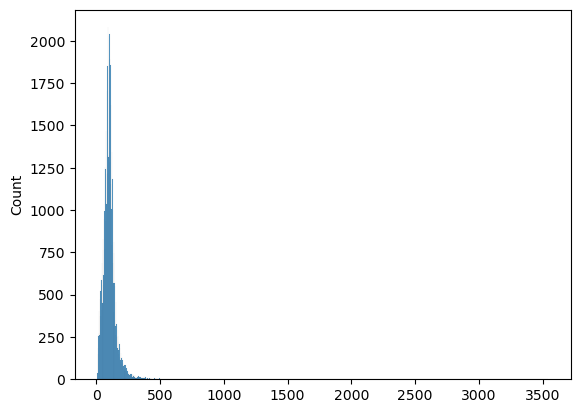

In [25]:
sns.histplot([len(text.split()) for text in prompt_responses_concatenated])

In [41]:
tokens_train = tokenizer.batch_encode_plus(train_data.tolist(), max_length = 350, truncation = True, padding = 'max_length')

In [45]:
tokens_test = tokenizer.batch_encode_plus(test_data.tolist(), max_length = 350, truncation = True, padding = 'max_length')

In [44]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

In [47]:
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [50]:
for param in bert.parameters():
    param.requires_grad = False

In [51]:
class BERT_architecture(nn.Module):

    def __init__(self, bert):
      super(BERT_architecture, self).__init__()
      self.bert = bert
      self.dropout = nn.Dropout(0.2)
      self.relu =  nn.ReLU()
      self.fc1 = nn.Linear(768,512)
      self.fc2 = nn.Linear(512,2)
      self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, sent_id, mask):
      _, cls_hs = self.bert(sent_id, attention_mask=mask, return_dict=False)
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)
      x = self.softmax(x)
      return x

In [53]:
model = BERT_architecture(bert)
optimizer = AdamW(model.parameters(), lr = 1e-5)

In [54]:
def train():
  model.train()
  total_loss, total_accuracy = 0, 0

  # empty list to save model predictions
  total_preds=[]

  # iterate over batches
  for step,batch in enumerate(train_dataloader):

    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
    sent_id, mask, labels = batch

    # clear previously calculated gradients
    model.zero_grad()

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)

  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [55]:
def evaluate():
  print("\nEvaluating...")

  # deactivate dropout layers
  model.eval()
  total_loss, total_accuracy = 0, 0

  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):

    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:

      # # Calculate elapsed time in minutes.
      # elapsed = format_time(time.time() - t0)
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]
    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():

      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader)

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)
  return avg_loss, total_preds

In [56]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the selected device (GPU or CPU)
model.to(device)

# Get predictions for test data
with torch.no_grad():
    # Move data to device and perform prediction
    preds = model(test_seq.to(device), test_mask.to(device))
    
    # Move the predictions to CPU for further processing
    preds = preds.detach().cpu().numpy()

# Convert predictions to class labels (0 or 1 for binary classification)
pred = np.argmax(preds, axis=1)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

RuntimeError: [enforce fail at alloc_cpu.cpp:121] data. DefaultCPUAllocator: not enough memory: you tried to allocate 18540748800 bytes.